In [232]:
#Import dependencies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #very efficient array and linear algebra functions
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Scikit-learn machine learning library for Python
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [233]:
#Load the CSV file as a Pandas DataFrame and preview the DataFrame
df = pd.read_csv("salaries-by-college-type.csv")
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [234]:
#Load the CSV file as a Pandas DataFrame and preview the DataFrame
region_df = pd.read_csv("salaries-by-region.csv")
region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [235]:
#Remove the fields from the data set that we don't want to include in our model

del df['Mid-Career Median Salary']
del df['Mid-Career 10th Percentile Salary']
del df['Mid-Career 25th Percentile Salary']
del df['Mid-Career 75th Percentile Salary']
del df['Mid-Career 90th Percentile Salary']

In [236]:
df['Starting Median Salary']=(df['Starting Median Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [237]:

#Remove the fields from the data set that we don't want to include in our model

del region_df['Mid-Career Median Salary']
del region_df['Mid-Career 10th Percentile Salary']
del region_df['Mid-Career 25th Percentile Salary']
del region_df['Mid-Career 75th Percentile Salary']
del region_df['Mid-Career 90th Percentile Salary']

In [238]:
region_df.head()

,School Name,Region,Starting Median Salary
0,Stanford University,California,"$70,400.00"
1,California Institute of Technology (CIT),California,"$75,500.00"
2,Harvey Mudd College,California,"$71,800.00"
3,"University of California, Berkeley",California,"$59,900.00"
4,Occidental College,California,"$51,900.00"


In [239]:
region_df['Starting Median Salary']=(region_df['Starting Median Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [240]:
joined_df = pd.merge(df, region_df, on=["School Name", "School Name"])
joined_df

,School Name,School Type,Starting Median Salary_x,Region,Starting Median Salary_y
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,Northeastern,72200.0
1,California Institute of Technology (CIT),Engineering,75500.0,California,75500.0
2,Harvey Mudd College,Engineering,71800.0,California,71800.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,Northeastern,62400.0
4,Cooper Union,Engineering,62200.0,Northeastern,62200.0
...,...,...,...,...,...
263,Austin Peay State University,State,37700.0,Southern,37700.0
264,Pittsburg State University,State,40400.0,Midwestern,40400.0
265,Southern Utah University,State,41900.0,Western,41900.0
266,Montana State University - Billings,State,37900.0,Western,37900.0


In [241]:
del joined_df['Starting Median Salary_x']

In [242]:
joined_df

,School Name,School Type,Region,Starting Median Salary_y
0,Massachusetts Institute of Technology (MIT),Engineering,Northeastern,72200.0
1,California Institute of Technology (CIT),Engineering,California,75500.0
2,Harvey Mudd College,Engineering,California,71800.0
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0
4,Cooper Union,Engineering,Northeastern,62200.0
...,...,...,...,...
263,Austin Peay State University,State,Southern,37700.0
264,Pittsburg State University,State,Midwestern,40400.0
265,Southern Utah University,State,Western,41900.0
266,Montana State University - Billings,State,Western,37900.0


In [243]:
renamed_df = joined_df.rename(columns={'School Name':'School_Name', 'School Type':'School_Type', 'Starting Median Salary_y':'Starting_Median_Salary'}, inplace=False)

In [244]:
print(renamed_df)

                                      School_Name  School_Type        Region  \
0     Massachusetts Institute of Technology (MIT)  Engineering  Northeastern   
1        California Institute of Technology (CIT)  Engineering    California   
2                             Harvey Mudd College  Engineering    California   
3    Polytechnic University of New York, Brooklyn  Engineering  Northeastern   
4                                    Cooper Union  Engineering  Northeastern   
..                                            ...          ...           ...   
263                  Austin Peay State University        State      Southern   
264                    Pittsburg State University        State    Midwestern   
265                      Southern Utah University        State       Western   
266           Montana State University - Billings        State       Western   
267                  Black Hills State University        State    Midwestern   

     Starting_Median_Salary  
0        

In [245]:
#determine mean by region for engineering
engineering = renamed_df[renamed_df["School_Type"]=="Engineering"]
engineering

,School_Name,School_Type,Region,Starting_Median_Salary
0,Massachusetts Institute of Technology (MIT),Engineering,Northeastern,72200.0
1,California Institute of Technology (CIT),Engineering,California,75500.0
2,Harvey Mudd College,Engineering,California,71800.0
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0
4,Cooper Union,Engineering,Northeastern,62200.0
5,Worcester Polytechnic Institute (WPI),Engineering,Northeastern,61000.0
6,Carnegie Mellon University (CMU),Engineering,Northeastern,61800.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,Northeastern,61100.0
8,Georgia Institute of Technology,Engineering,Southern,58300.0
9,Colorado School of Mines,Engineering,Western,58100.0


In [246]:
engineering1 = engineering[["Starting_Median_Salary", "Region"]]
engineering1

,Starting_Median_Salary,Region
0,72200.0,Northeastern
1,75500.0,California
2,71800.0,California
3,62400.0,Northeastern
4,62200.0,Northeastern
5,61000.0,Northeastern
6,61800.0,Northeastern
7,61100.0,Northeastern
8,58300.0,Southern
9,58100.0,Western


In [247]:
engineering2 = engineering1.groupby("Region").Starting_Median_Salary.mean().to_frame()
engineering2

,Starting_Median_Salary
Region,
California,73650.000000
Midwestern,55900.000000
Northeastern,60355.555556
Southern,52666.666667
Western,54550.000000


In [248]:
#Change to integer
e = [int(i) for i in engineering2['Starting_Median_Salary']]
e

[73650, 55900, 60355, 52666, 54550]

In [249]:
engineering2["Starting_Median_Salary"] = e
engineering2

,Starting_Median_Salary
Region,
California,73650
Midwestern,55900
Northeastern,60355
Southern,52666
Western,54550


In [250]:
engineering2=engineering2.reset_index()

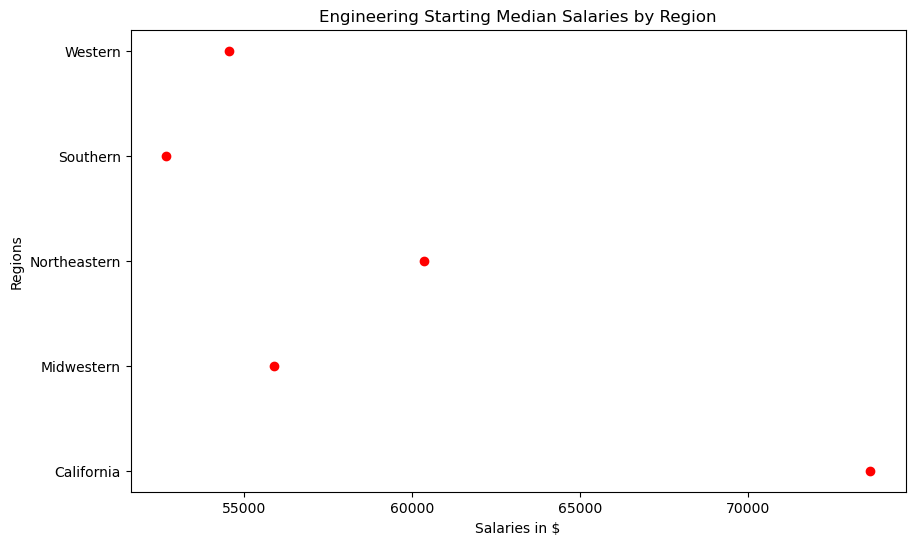

In [251]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=engineering2['Starting_Median_Salary'], y=engineering2['Region'], color="r")
plt.title('Engineering Starting Median Salaries by Region')
plt.xlabel('Salaries in $')
plt.ylabel('Regions')
plt.show()

In [252]:
#determine state school type mean by region
state = renamed_df[renamed_df['School_Type']=='State']
state
#state1 = state[["Starting_Median_Salary", "Region"]]
#state2 = state1.groupby("Region").Starting_Median_Salary.mean().to_frame()
#state2

,School_Name,School_Type,Region,Starting_Median_Salary
19,University of Illinois at Urbana-Champaign (UIUC),State,Midwestern,52900.0
21,"University of Maryland, College Park",State,Southern,52000.0
23,"University of California, Santa Barbara (UCSB)",State,California,50500.0
25,University of Texas (UT) - Austin,State,Southern,49700.0
27,State University of New York (SUNY) at Albany,State,Northeastern,44500.0
...,...,...,...,...
263,Austin Peay State University,State,Southern,37700.0
264,Pittsburg State University,State,Midwestern,40400.0
265,Southern Utah University,State,Western,41900.0
266,Montana State University - Billings,State,Western,37900.0


In [253]:
state1 = state[["Starting_Median_Salary", "Region"]]
state1

,Starting_Median_Salary,Region
19,52900.0,Midwestern
21,52000.0,Southern
23,50500.0,California
25,49700.0,Southern
27,44500.0,Northeastern
...,...,...
263,37700.0,Southern
264,40400.0,Midwestern
265,41900.0,Western
266,37900.0,Western


In [254]:
state2 = state1.groupby("Region").Starting_Median_Salary.mean().to_frame()
state2

,Starting_Median_Salary
Region,
California,48304.761905
Midwestern,43190.000000
Northeastern,44148.000000
Southern,43372.000000
Western,43996.551724


In [255]:
#Change to integer
e = [int(i) for i in state2['Starting_Median_Salary']]
e

[48304, 43190, 44148, 43372, 43996]

In [256]:
state2["Starting_Median_Salary"] = e
state2

,Starting_Median_Salary
Region,
California,48304
Midwestern,43190
Northeastern,44148
Southern,43372
Western,43996


In [257]:
state2=state2.reset_index()

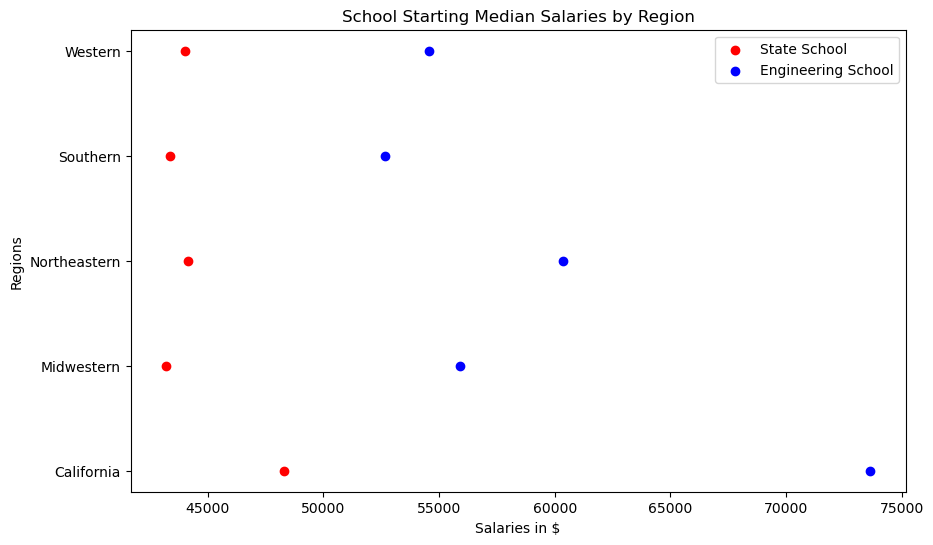

In [258]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=state2['Starting_Median_Salary'], y=state2['Region'], color="r", label = "State School")
ax.scatter(x=engineering2['Starting_Median_Salary'], y=engineering2['Region'], color="b", label = "Engineering School")
plt.title('School Starting Median Salaries by Region')
plt.xlabel('Salaries in $')
plt.ylabel('Regions')
plt.legend()
plt.show()

In [259]:
#determine party school type salary mean by region
party = renamed_df[renamed_df['School_Type']=='Party']
party1 = party[["Starting_Median_Salary", "Region"]]
party2 = party1.groupby("Region").Starting_Median_Salary.mean().to_frame()
e = [int(i) for i in party2['Starting_Median_Salary']]
party2["Starting_Median_Salary"] = e
party2=party2.reset_index()

In [260]:
#deteremine liberal arts school type salary mean by region
liberal = renamed_df[renamed_df['School_Type']=='Liberal Arts']
liberal1 = liberal[["Starting_Median_Salary", "Region"]]
liberal2 = liberal1.groupby("Region").Starting_Median_Salary.mean().to_frame()
e = [int(i) for i in liberal2['Starting_Median_Salary']]
liberal2['Starting_Median_Salary'] = e
liberal2=liberal2.reset_index()

In [261]:
#deteremine ivy league school type salary mean by region
ivy = renamed_df[renamed_df['School_Type']=='Ivy League']
ivy1 = ivy[["Starting_Median_Salary", "Region"]]
ivy2 = ivy1.groupby("Region").Starting_Median_Salary.mean().to_frame()
e = [int(i) for i in ivy2['Starting_Median_Salary']]
ivy2['Starting_Median_Salary'] = e
ivy2=ivy2.reset_index()

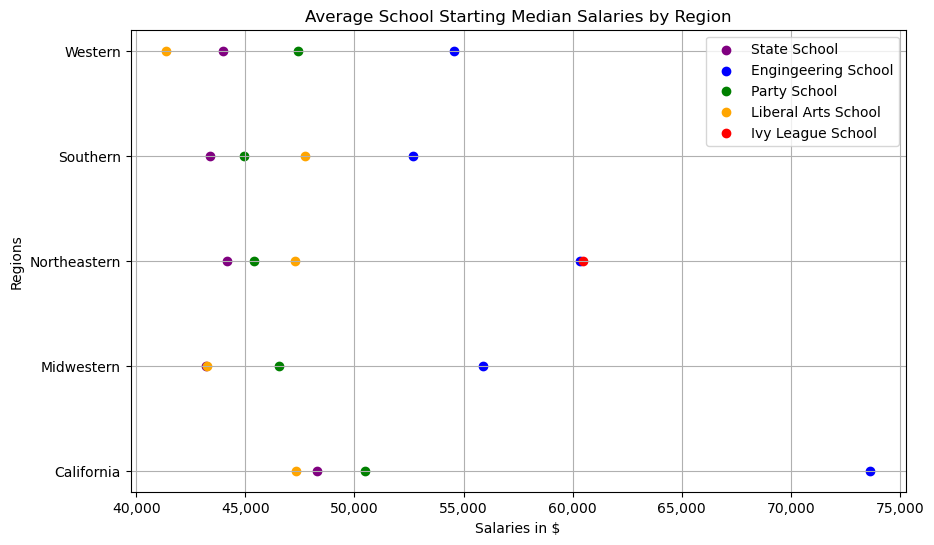

In [262]:
fig, ax = plt.subplots(figsize=(10,6))
y= len(engineering2.index) - engineering2.index + 1
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.scatter(x=state2['Starting_Median_Salary'], y=state2['Region'], color="purple", label="State School")
ax.scatter(x=engineering2['Starting_Median_Salary'], y=engineering2['Region'], color="b", label = "Engingeering School")
ax.scatter(x=party2['Starting_Median_Salary'], y=party2['Region'], color="g", label = "Party School")
ax.scatter(x=liberal2['Starting_Median_Salary'], y=liberal2['Region'], c="orange", label = "Liberal Arts School")
ax.scatter(x=ivy2['Starting_Median_Salary'], y=ivy2['Region'], color="r", label = "Ivy League School")
plt.title('Average School Starting Median Salaries by Region')
plt.xlabel('Salaries in $')
plt.ylabel('Regions')
leg=ax.legend()
plt.grid(True)
plt.show()

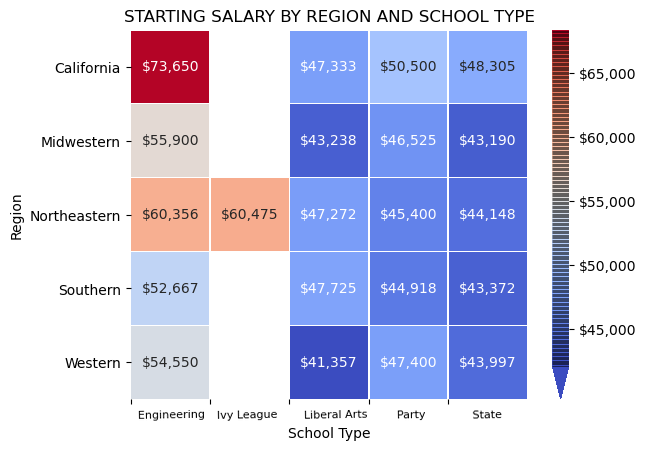

In [292]:
pivotinfo = pd.pivot_table(renamed_df,index=['Region'],columns=['School_Type'], values =['Starting_Median_Salary'])
fig, ax = plt.subplots(1)
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1, 
            "drawedges":True}
p = sns.heatmap(pivotinfo, linewidths = .4, cmap='coolwarm', robust=True, annot=True, fmt=".0f", ax=ax, cbar_kws=cbar_kws)
plt.xlabel('School Type')
plt.ylabel("Region")
title = 'Starting Salary by Region and School Type'.upper()
plt.title(title, loc='center')
for t in p.texts:
    t.set_text('${:,d}'.format(int(t.get_text()))) 
plt.xticks(np.arange(5), ('  Engineering', '  Ivy League','    Liberal Arts','        Party','       State'), rotation=1, horizontalalignment='left', fontsize=8)
cbar = ax.collections[0].colorbar
cbar.set_ticks([45000, 50000, 55000, 60000, 65000])
cbar.set_ticklabels(['$45,000', '$50,000', '$55,000', '$60,000', '$65,000'])